# Green House Controls using Fuzzy Logic

## Install and Import Dependencies

In [1]:
!pip install scikit-fuzzy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

## Define Universes

In [21]:
# input
temp_range = np.arange(15, 46, 1)   # อุณหภูมิ 15°C ถึง 45°C
hum_range = np.arange(20, 101, 1)   # ความชื้นสัมพัทธ์ 20% ถึง 100%
light_range = np.arange(0, 1001, 1) # ช่วงของแสง: 0–1000 lux

# output
output_range = np.arange(0, 101, 1) # Fan/Mist/LED Brightness: 0% ถึง 100%

## Create Membership function for Temperature

In [8]:
# ฟังก์ชันอุณหภูมิแบบสามเหลี่ยม
temp_cold = fuzz.trimf(temp_range, [15, 15, 25])
temp_medium = fuzz.trimf(temp_range, [20, 30, 40])
temp_hot = fuzz.trimf(temp_range, [35, 45, 45])

In [11]:
# รวมข้อมูลเป็น DataFrame เพื่อดูง่ายขึ้น
temp_df = pd.DataFrame({
    "Temperature (°C)": temp_range,
    "Cold": temp_cold,
    "Medium": temp_medium,
    "Hot": temp_hot
})

temp_df.head(15)

,Temperature (°C),Cold,Medium,Hot
0,15,1.0,0.0,0.0
1,16,0.9,0.0,0.0
2,17,0.8,0.0,0.0
3,18,0.7,0.0,0.0
4,19,0.6,0.0,0.0
5,20,0.5,0.0,0.0
6,21,0.4,0.1,0.0
7,22,0.3,0.2,0.0
8,23,0.2,0.3,0.0
9,24,0.1,0.4,0.0


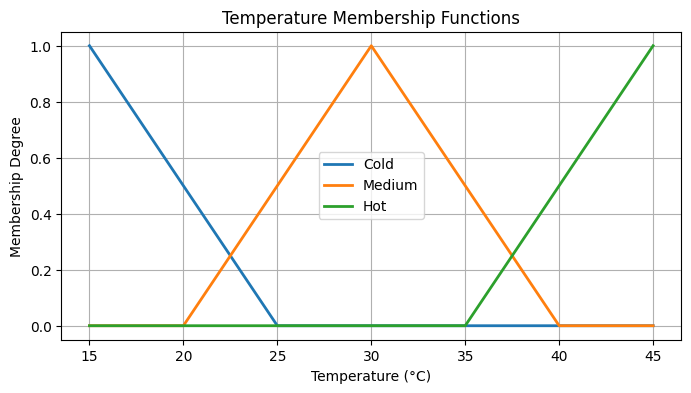

In [6]:
# 🔁 วาดกราฟ Membership Function ของอุณหภูมิ
plt.figure(figsize=(8, 4))
plt.plot(temp_range, temp_cold, label='Cold', linewidth=2)
plt.plot(temp_range, temp_medium, label='Medium', linewidth=2)
plt.plot(temp_range, temp_hot, label='Hot', linewidth=2)

plt.title("Temperature Membership Functions")
plt.xlabel("Temperature (°C)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

## Create Membership function for Humidity

In [12]:
# ฟังก์ชันความชื้นแบบสามเหลี่ยม
hum_dry = fuzz.trimf(hum_range, [20, 20, 50])
hum_normal = fuzz.trimf(hum_range, [40, 60, 80])
hum_wet = fuzz.trimf(hum_range, [70, 100, 100])

In [14]:
# รวมเป็น DataFrame
hum_df = pd.DataFrame({
    "Humidity (%RH)": hum_range,
    "Dry": hum_dry,
    "Normal": hum_normal,
    "Wet": hum_wet
})

hum_df.head(15)

,Humidity (%RH),Dry,Normal,Wet
0,20,1.000000,0.0,0.0
1,21,0.966667,0.0,0.0
2,22,0.933333,0.0,0.0
3,23,0.900000,0.0,0.0
4,24,0.866667,0.0,0.0
5,25,0.833333,0.0,0.0
6,26,0.800000,0.0,0.0
7,27,0.766667,0.0,0.0
8,28,0.733333,0.0,0.0
9,29,0.700000,0.0,0.0


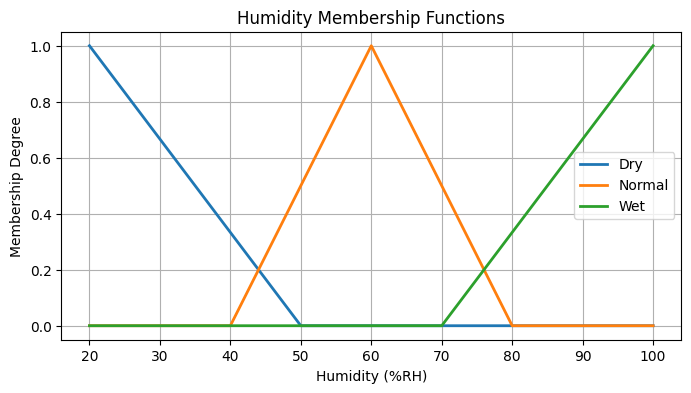

In [16]:
# วาดกราฟความชื้น
plt.figure(figsize=(8, 4))
plt.plot(hum_range, hum_dry, label='Dry', linewidth=2)
plt.plot(hum_range, hum_normal, label='Normal', linewidth=2)
plt.plot(hum_range, hum_wet, label='Wet', linewidth=2)

plt.title("Humidity Membership Functions")
plt.xlabel("Humidity (%RH)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

## Create Membership function for Light Intensity

In [18]:
# ฟังก์ชันแสงแบบสามเหลี่ยม
light_dark = fuzz.trimf(light_range, [0, 0, 300])
light_normal = fuzz.trimf(light_range, [200, 500, 800])
light_bright = fuzz.trimf(light_range, [600, 1000, 1000])

In [19]:
# รวมเป็น DataFrame
light_df = pd.DataFrame({
    "Light (lux)": light_range,
    "Dark": light_dark,
    "Normal": light_normal,
    "Bright": light_bright
})

light_df.head(15)

,Light (lux),Dark,Normal,Bright
0,0,1.000000,0.0,0.0
1,1,0.996667,0.0,0.0
2,2,0.993333,0.0,0.0
3,3,0.990000,0.0,0.0
4,4,0.986667,0.0,0.0
5,5,0.983333,0.0,0.0
6,6,0.980000,0.0,0.0
7,7,0.976667,0.0,0.0
8,8,0.973333,0.0,0.0
9,9,0.970000,0.0,0.0


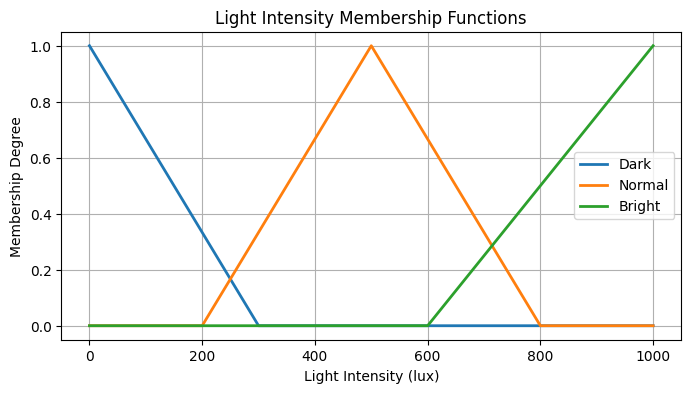

In [20]:
# วาดกราฟความเข้มแสง
plt.figure(figsize=(8, 4))
plt.plot(light_range, light_dark, label='Dark', linewidth=2)
plt.plot(light_range, light_normal, label='Normal', linewidth=2)
plt.plot(light_range, light_bright, label='Bright', linewidth=2)

plt.title("Light Intensity Membership Functions")
plt.xlabel("Light Intensity (lux)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()


## Output Membership Function for Fan

In [22]:
# พัดลม: ปิด / เบา / กลาง / แรง
fan_off = fuzz.trimf(output_range, [0, 0, 25])
fan_low = fuzz.trimf(output_range, [10, 30, 50])
fan_medium = fuzz.trimf(output_range, [40, 60, 80])
fan_high = fuzz.trimf(output_range, [70, 100, 100])

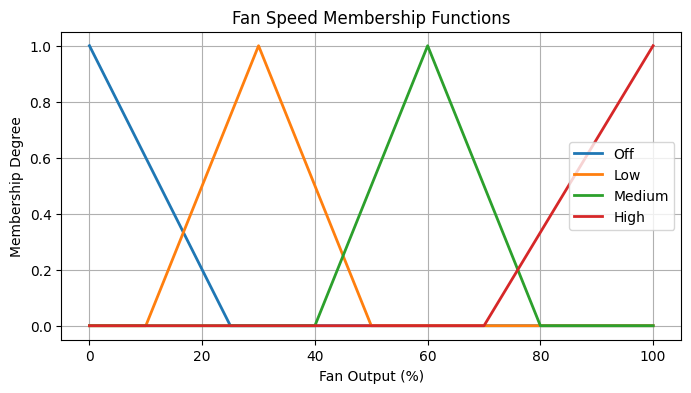

In [24]:
# Fan Speed
plt.figure(figsize=(8, 4))
plt.plot(output_range, fan_off, label='Off', linewidth=2)
plt.plot(output_range, fan_low, label='Low', linewidth=2)
plt.plot(output_range, fan_medium, label='Medium', linewidth=2)
plt.plot(output_range, fan_high, label='High', linewidth=2)
plt.title("Fan Speed Membership Functions")
plt.xlabel("Fan Output (%)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

## Output Membership Function for Mist

In [23]:
# พ่นหมอก: ปิด / เบา / กลาง / แรง
mist_off = fuzz.trimf(output_range, [0, 0, 25])
mist_low = fuzz.trimf(output_range, [10, 30, 50])
mist_medium = fuzz.trimf(output_range, [40, 60, 80])
mist_high = fuzz.trimf(output_range, [70, 100, 100])

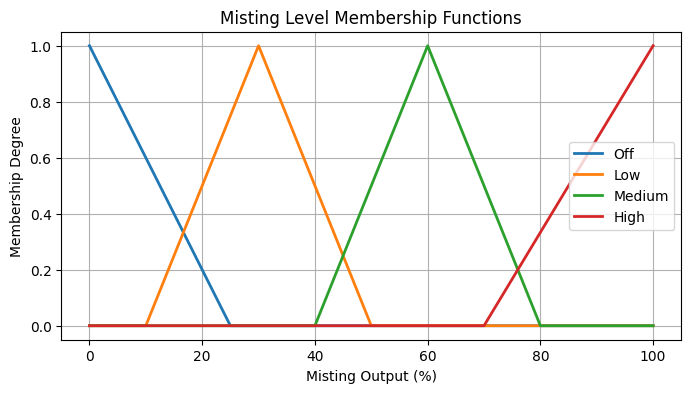

In [25]:
# Misting Level
plt.figure(figsize=(8, 4))
plt.plot(output_range, mist_off, label='Off', linewidth=2)
plt.plot(output_range, mist_low, label='Low', linewidth=2)
plt.plot(output_range, mist_medium, label='Medium', linewidth=2)
plt.plot(output_range, mist_high, label='High', linewidth=2)
plt.title("Misting Level Membership Functions")
plt.xlabel("Misting Output (%)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

## Output Membership Function for LED

In [27]:
# LED Brightness: ปิด / หรี่ / ปกติ / สว่างมาก
led_off = fuzz.trimf(output_range, [0, 0, 25])
led_dim = fuzz.trimf(output_range, [10, 30, 50])
led_normal = fuzz.trimf(output_range, [40, 60, 80])
led_bright = fuzz.trimf(output_range, [70, 100, 100])

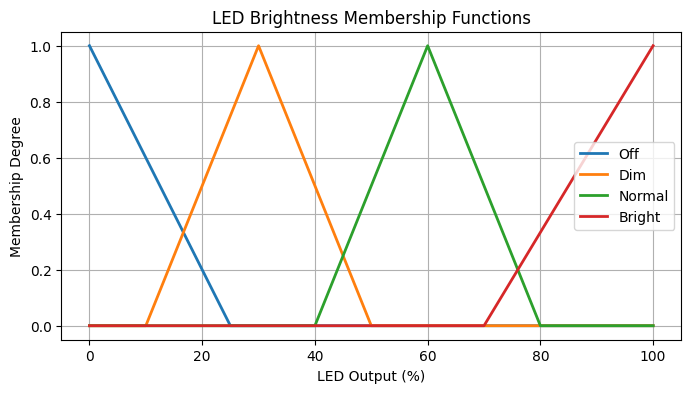

In [28]:
# วาดกราฟความสว่างของ LED
plt.figure(figsize=(8, 4))
plt.plot(output_range, led_off, label='Off', linewidth=2)
plt.plot(output_range, led_dim, label='Dim', linewidth=2)
plt.plot(output_range, led_normal, label='Normal', linewidth=2)
plt.plot(output_range, led_bright, label='Bright', linewidth=2)

plt.title("LED Brightness Membership Functions")
plt.xlabel("LED Output (%)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

In [30]:
# รวมเป็น DataFrame ตัวอย่าง
output_df = pd.DataFrame({
    "Output (%)": output_range,
    "Fan_Off": fan_off,
    "Fan_Low": fan_low,
    "Fan_Medium": fan_medium,
    "Fan_High": fan_high,
    "Mist_Off": mist_off,
    "Mist_Low": mist_low,
    "Mist_Medium": mist_medium,
    "Mist_High": mist_high,
    "LED_Off": led_off,
    "LED_Dim": led_dim,
    "LED_Normal": led_normal,
    "LED_Bright": led_bright
})

output_df.head(15)

,Output (%),Fan_Off,Fan_Low,Fan_Medium,Fan_High,Mist_Off,Mist_Low,Mist_Medium,Mist_High,LED_Off,LED_Dim,LED_Normal,LED_Bright
0,0,1.00,0.00,0.0,0.0,1.00,0.00,0.0,0.0,1.00,0.00,0.0,0.0
1,1,0.96,0.00,0.0,0.0,0.96,0.00,0.0,0.0,0.96,0.00,0.0,0.0
2,2,0.92,0.00,0.0,0.0,0.92,0.00,0.0,0.0,0.92,0.00,0.0,0.0
3,3,0.88,0.00,0.0,0.0,0.88,0.00,0.0,0.0,0.88,0.00,0.0,0.0
4,4,0.84,0.00,0.0,0.0,0.84,0.00,0.0,0.0,0.84,0.00,0.0,0.0
5,5,0.80,0.00,0.0,0.0,0.80,0.00,0.0,0.0,0.80,0.00,0.0,0.0
6,6,0.76,0.00,0.0,0.0,0.76,0.00,0.0,0.0,0.76,0.00,0.0,0.0
7,7,0.72,0.00,0.0,0.0,0.72,0.00,0.0,0.0,0.72,0.00,0.0,0.0
8,8,0.68,0.00,0.0,0.0,0.68,0.00,0.0,0.0,0.68,0.00,0.0,0.0
9,9,0.64,0.00,0.0,0.0,0.64,0.00,0.0,0.0,0.64,0.00,0.0,0.0


## Fuzzy Rule Base (IF–THEN Rules)

```
สร้างกฎที่เชื่อมโยง
---
Input: Temperature, Humidity, Light
Output: Fan, Misting, LED

```

In [34]:
# Fuzzy Rules – ครอบคลุม Temp, Hum, Light → Fan, Mist, LED

rules = [
    # 🔥 กฎจากอุณหภูมิและความชื้น
    {"IF": {"temp": "hot", "hum": "dry"}, "THEN": {"fan": "high", "mist": "high"}},
    {"IF": {"temp": "hot", "hum": "normal"}, "THEN": {"fan": "high", "mist": "low"}},
    {"IF": {"temp": "hot", "hum": "wet"}, "THEN": {"fan": "medium", "mist": "off"}},

    {"IF": {"temp": "medium", "hum": "dry"}, "THEN": {"fan": "medium", "mist": "medium"}},
    {"IF": {"temp": "medium", "hum": "normal"}, "THEN": {"fan": "medium", "mist": "low"}},
    {"IF": {"temp": "medium", "hum": "wet"}, "THEN": {"fan": "low", "mist": "off"}},

    {"IF": {"temp": "cold", "hum": "dry"}, "THEN": {"fan": "off", "mist": "low"}},
    {"IF": {"temp": "cold", "hum": "normal"}, "THEN": {"fan": "off", "mist": "off"}},
    {"IF": {"temp": "cold", "hum": "wet"}, "THEN": {"fan": "off", "mist": "off"}},

    # 🌞 กฎจากแสง
    {"IF": {"light": "dark"}, "THEN": {"led": "bright"}},
    {"IF": {"light": "normal"}, "THEN": {"led": "normal"}},
    {"IF": {"light": "bright"}, "THEN": {"led": "off"}},

    # 🧠 กฎแบบรวมหลายปัจจัย
    {"IF": {"temp": "hot", "hum": "dry", "light": "dark"}, "THEN": {"fan": "high", "mist": "high", "led": "bright"}},
    {"IF": {"temp": "medium", "hum": "dry", "light": "bright"}, "THEN": {"fan": "medium", "mist": "medium", "led": "off"}},
    {"IF": {"temp": "cold", "light": "dark"}, "THEN": {"fan": "off", "mist": "off", "led": "dim"}},
]

In [35]:
rules_df = pd.DataFrame([
    {
        "IF Temp": rule.get("IF", {}).get("temp", "-"),
        "IF Hum": rule.get("IF", {}).get("hum", "-"),
        "IF Light": rule.get("IF", {}).get("light", "-"),
        "Fan": rule.get("THEN", {}).get("fan", "-"),
        "Mist": rule.get("THEN", {}).get("mist", "-"),
        "LED": rule.get("THEN", {}).get("led", "-"),
    }
    for rule in rules
])

rules_df

,IF Temp,IF Hum,IF Light,Fan,Mist,LED
0,hot,dry,-,high,high,-
1,hot,normal,-,high,low,-
2,hot,wet,-,medium,off,-
3,medium,dry,-,medium,medium,-
4,medium,normal,-,medium,low,-
5,medium,wet,-,low,off,-
6,cold,dry,-,off,low,-
7,cold,normal,-,off,off,-
8,cold,wet,-,off,off,-
9,-,-,dark,-,-,bright


## Input (Crisp Input)

In [36]:
# ค่าอินพุตจำลองจากเซนเซอร์

input_temp = 38     # °C
input_hum = 40      # %RH
input_light = 150   # lux

## Fuzzification (แปลงค่าจริง → Membership)

In [37]:
# คำนวณระดับความเป็นสมาชิกในแต่ละกลุ่ม
temp_levels = {
    "cold": fuzz.interp_membership(temp_range, temp_cold, input_temp),
    "medium": fuzz.interp_membership(temp_range, temp_medium, input_temp),
    "hot": fuzz.interp_membership(temp_range, temp_hot, input_temp)
}

hum_levels = {
    "dry": fuzz.interp_membership(hum_range, hum_dry, input_hum),
    "normal": fuzz.interp_membership(hum_range, hum_normal, input_hum),
    "wet": fuzz.interp_membership(hum_range, hum_wet, input_hum)
}

light_levels = {
    "dark": fuzz.interp_membership(light_range, light_dark, input_light),
    "normal": fuzz.interp_membership(light_range, light_normal, input_light),
    "bright": fuzz.interp_membership(light_range, light_bright, input_light)
}

# แสดงผลระดับความเป็นสมาชิก
pd.DataFrame({
    "Temperature": temp_levels,
    "Humidity": hum_levels,
    "Light": light_levels
})

,Temperature,Humidity,Light
cold,0.0,NaN,NaN
medium,0.2,NaN,NaN
hot,0.3,NaN,NaN
dry,NaN,0.333333,NaN
normal,NaN,0.000000,0.0
wet,NaN,0.000000,NaN
dark,NaN,NaN,0.5
bright,NaN,NaN,0.0


## Inference (Rule Evaluation)

In [38]:
# Output fuzzy values
fan_activations = {"off": 0, "low": 0, "medium": 0, "high": 0}
mist_activations = {"off": 0, "low": 0, "medium": 0, "high": 0}
led_activations = {"off": 0, "dim": 0, "normal": 0, "bright": 0}

In [39]:
# วนผ่านทุกกฎ
for rule in rules:
    # Extract condition
    cond = rule.get("IF", {})

    # ประเมินระดับความจริงของเงื่อนไข
    degrees = []
    if "temp" in cond:
        degrees.append(temp_levels[cond["temp"]])
    if "hum" in cond:
        degrees.append(hum_levels[cond["hum"]])
    if "light" in cond:
        degrees.append(light_levels[cond["light"]])

    if not degrees:
        continue  # ไม่มีเงื่อนไข

    # ค่าความจริงของกฎนี้ (ใช้ AND logic → min)
    activation = min(degrees)

    # Map ไปยัง Output
    for out_key, out_val in rule["THEN"].items():
        if out_key == "fan":
            fan_activations[out_val] = max(fan_activations[out_val], activation)
        elif out_key == "mist":
            mist_activations[out_val] = max(mist_activations[out_val], activation)
        elif out_key == "led":
            led_activations[out_val] = max(led_activations[out_val], activation)

In [41]:
# รวมผลลัพธ์ทั้งหมด
inference_df = pd.DataFrame({
    "Fan": fan_activations,
    "Mist": mist_activations,
    "LED": led_activations
})

inference_df

,Fan,Mist,LED
off,0.0,0.0,0.0
low,0.0,0.0,NaN
medium,0.2,0.2,NaN
high,0.3,0.3,NaN
dim,NaN,NaN,0.0
normal,NaN,NaN,0.0
bright,NaN,NaN,0.5


## Defuzzification

- ใช้ Weighted Average (Centroid method)

- สำหรับแต่ละ Output (Fan, Mist, LED):

- รวมค่าฟังก์ชันแต่ละชุดที่ถูก "เปิดใช้งาน"

- ใช้ np.fmax() รวมกันแบบ fuzzy OR

- ใช้ fuzz.defuzz() เพื่อหาค่าเฉลี่ยถ่วงน้ำหนัก

In [42]:
# เตรียม output fuzzy set
# Fan
fan_agg = np.fmax(
    np.fmax(
        fan_activations["off"] * fan_off,
        fan_activations["low"] * fan_low
    ),
    np.fmax(
        fan_activations["medium"] * fan_medium,
        fan_activations["high"] * fan_high
    )
)

# Mist
mist_agg = np.fmax(
    np.fmax(
        mist_activations["off"] * mist_off,
        mist_activations["low"] * mist_low
    ),
    np.fmax(
        mist_activations["medium"] * mist_medium,
        mist_activations["high"] * mist_high
    )
)

# LED
led_agg = np.fmax(
    np.fmax(
        led_activations["off"] * led_off,
        led_activations["dim"] * led_dim
    ),
    np.fmax(
        led_activations["normal"] * led_normal,
        led_activations["bright"] * led_bright
    )
)

In [43]:
# Defuzzify → ค่าควบคุมจริง
fan_result = fuzz.defuzz(output_range, fan_agg, 'centroid')
mist_result = fuzz.defuzz(output_range, mist_agg, 'centroid')
led_result = fuzz.defuzz(output_range, led_agg, 'centroid')

In [45]:
# แสดงผลลัพธ์สุดท้าย
final_df = pd.DataFrame({
    "Final Output (%)": {
        "Fan Speed": round(fan_result, 2),
        "Misting Level": round(mist_result, 2),
        "LED Brightness": round(led_result, 2)
    }
})

final_df

,Final Output (%)
Fan Speed,75.91
Misting Level,75.91
LED Brightness,90.00
